In [ ]:
# Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset containsinformationaboutvarioushousesinBostonthroughdifferent parametersT.hereare s06 samples and 14 feature variables in this dataset.

# 1. Simple regression with 1 feature, multiple linear with many features. Find the correlation and the heat map. Dataset-Boston

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('BostonHousing.csv')

print(df.head())
print("-" * 100)

print(df.describe())
print("-" * 100)

print(df.dtypes)
print("-" * 100)

print(df.isnull().sum())
print("-" * 100)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
----------------------------------------------------------------------------------------------------
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.32

# Simple Linear Regression

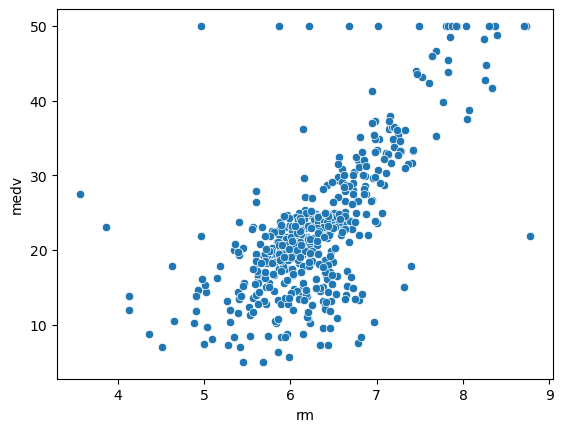

In [4]:
# See the relationship between the rooms and the price
sns.scatterplot(x='rm', y='medv', data=df)
plt.show()

In [45]:
X = df['rm'].values.reshape(-1, 1) # reshape(-1, 1) is used to convert the 1D array to 2D array
# The data is reshaped to 2D array because the LinearRegression model expects the data to be in 2D array

y = df['medv'].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=0 means the data will be split randomly

In [8]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

# Pridicting the price of a house with 6 rooms
print(regressor.predict([[6]]))

[22.90445223 21.80741526 23.2795076  13.67809006 21.95743741 18.22563646
 18.89135974 19.48207195 10.15256956 23.5795519  19.37893173 25.94240075
 22.9794633   7.1427502  36.67836079 29.54293232 22.05120126 31.84952286
 24.90162209 18.37565861 23.77645597 18.65695014 20.97291706 24.30153349
 16.80042604 -0.25521702 19.4539428  17.05358842 39.1818554  20.64474361
 21.51674735 20.54160338 21.90117911 20.67287276 23.68269213 17.93496854
 19.66022326 18.61006821 23.04509799 21.30109051 20.97291706 17.77557001
 21.13231559 14.40944804 24.84536378 23.72957405 17.81307555 20.99166983
  9.49622266 26.59874765 21.20732667 16.68790943 19.60396495 40.96336842
 17.50365486 18.74133759 17.02545926 18.82572505 17.50365486 19.40706088
 18.69445567 20.84164768 28.98972565 24.95788039 17.09109396 24.99538593
 25.92364798 23.31701314 27.77079569 18.76009036 22.39812748 22.46376217
 22.5012677  27.97707614 26.81440449 10.40573194 40.85085181 22.83881754
 23.69206851 17.85058108 25.46420515 24.03899473 16

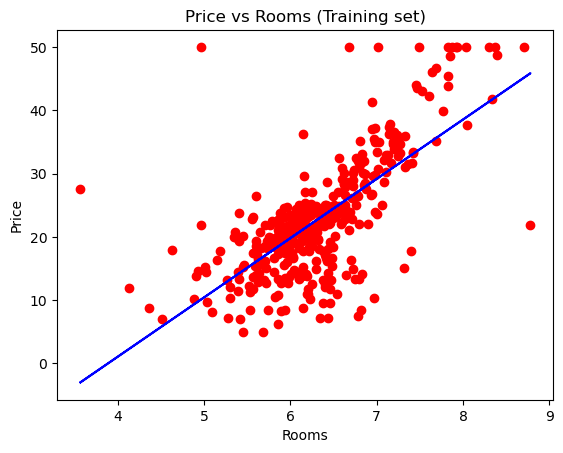

In [10]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Rooms (Training set)')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

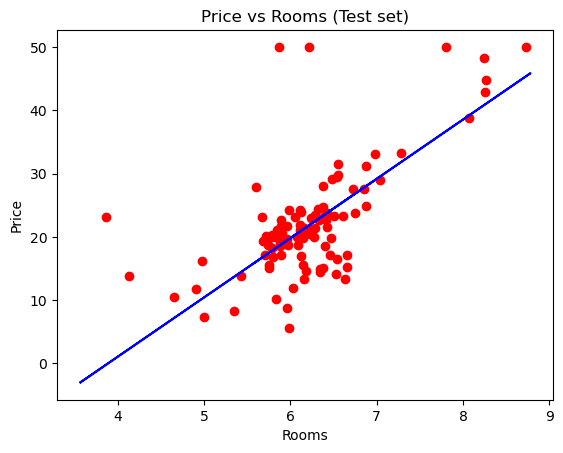

In [11]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Rooms (Test set)')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

In [12]:
# Evaluating the Model Performance
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

# Checking the accuracy of the model
print(regressor.score(X_test, y_test))

46.90735162739529
0.423943868164563


# Multiple Linear Regression

In [18]:
X = df.drop('medv', axis=1)
print(X)

y = df['medv']
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 27.26856352 19.29492159 28.62304496 19.17978838 18.9

In [26]:
# Evaluating the Model Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"mean_squared_error: {mean_squared_error(y_test, y_pred)}")
print(f"r2_score: {r2_score(y_test, y_pred)}")

# Mean Squared Error (MSE) is the average of the square of the errors. The larger the number the larger the error
# R2 Score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The larger the number the better the model. The best possible score is 1.0


mean_squared_error: 33.44897999767644
r2_score: 0.5892223849182519


             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

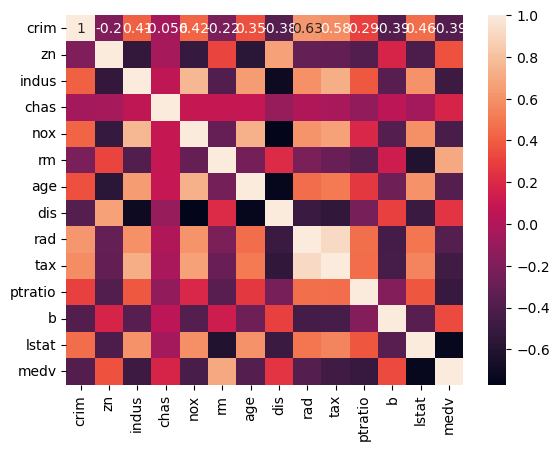

In [44]:
# Correlation
# Correlation refers to the statistical relationship between two variables. It measures how much and in what way one variable changes when another variable changes. The correlation coefficient, typically denoted as r
# r, ranges from -1 to 1:
# -1 indicates a perfect negative linear relationship between variables.
# 0 indicates no linear relationship between variables.
# 1 indicates a perfect positive linear relationship between variables.

correlation = df.corr()
print(correlation)

# Heatmap
sns.heatmap(correlation, annot=True)    # annot=True is used to display the correlation values on the heatmap
plt.show()
